# Useful methods
## pandas
    df.isna().sum()
    df.column.value_counts()
    pd.to_datetime(df.column)

# Tasks
    1. Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.
    2. Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.
    3. Сколько транзакций завершились ошибкой?
    4. Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.
    5. Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.
    6. Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
    7. Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

# Data
    transaction_data.csv
    transaction_data_updated.csv

In [335]:
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

# Data description
    date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
    name – имя пользователя
    transaction – статус транзакции
    minute* – сколько минут прошло с начала дня

### Task 1

In [336]:
df = pd.read_csv('transaction_data.csv')

In [337]:
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [338]:
df.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [339]:
df.shape

(5315, 3)

In [340]:
# посмотрим количество пропусков в датафрейме
df.isna().sum()

date           0
name           0
transaction    0
dtype: int64

В питоне ***False*** кодируется как 0, а ***True*** как 1. Для анализа пропусков это удобный чит.

### Task 2

In [341]:
df.head(3)

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull


In [342]:
df_task2 = df.groupby('transaction', as_index=False) \
                .agg({'date' : 'count'}) \
                .sort_values('date', ascending=False)

<AxesSubplot: xlabel='transaction', ylabel='date'>

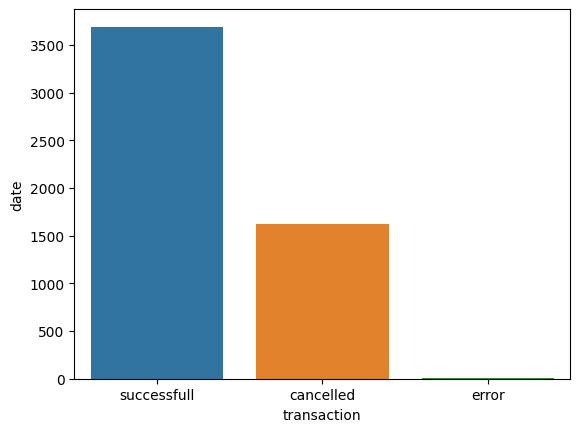

In [343]:
sns.barplot(x=df_task2.transaction, y=df_task2.date)

### Task 3

In [344]:
df.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

### Task 4

In [345]:
df_task4 = df.query('transaction == "successfull"') \
            .groupby('name', as_index=False) \
            .agg({'date' : 'count'}) \
            .rename(columns={'date' : 'count'}) \
            .sort_values('count')

In [346]:
df_task4.tail()

,name,count
33,Masha_Polyanova,78
43,Svetlana_Ivanova,79
41,Olga_Smirnova,80
31,Masha_Ozerova,80
48,Svetlana_Smirnova,82


In [347]:
# количество пользователей с таким числом транзакций (пользователи справа)
df_task4 = pd.DataFrame(df_task4['count'].value_counts())

In [348]:
users_count = df_task4['count'].sum()
users_count

56

In [349]:
df_task4 = df_task4.reset_index()

In [350]:
df_task4.head()

,index,count
0,63,6
1,62,5
2,67,4
3,60,3
4,76,3


In [351]:
df_task4['percent'] = df_task4['count'] * 100 / users_count

In [352]:
df_task4.head()

,index,count,percent
0,63,6,10.714286
1,62,5,8.928571
2,67,4,7.142857
3,60,3,5.357143
4,76,3,5.357143


<AxesSubplot: xlabel='count', ylabel='percent'>

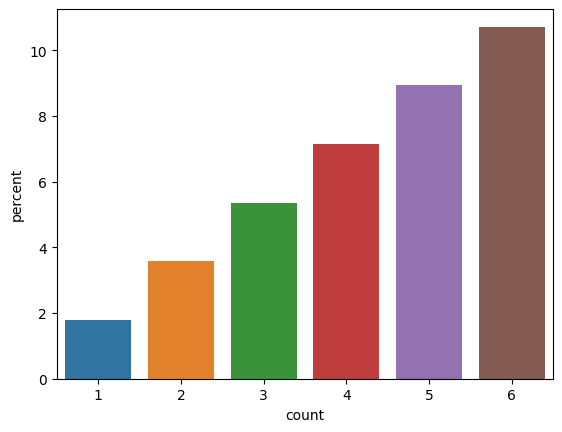

In [353]:
# построим гистрограмму
# по x - число транзакций
# по y - доля пользователей с таким числом транзакций
sns.barplot(x=df_task4['count'], y=df_task4['percent'])

In [354]:
df_task4['index'].describe()

count    27.000000
mean     66.259259
std       9.333944
min      46.000000
25%      59.500000
50%      66.000000
75%      73.500000
max      82.000000
Name: index, dtype: float64

### Task 5

In [355]:
!ls

time_and_pivot_tables.ipynb  transaction_data.csv  transaction_data_updated.csv


In [356]:
updated_df = pd.read_csv('transaction_data_updated.csv')

In [357]:
# проверим на пропуски
updated_df.isna().sum()

date           0
name           0
transaction    0
minute         0
dtype: int64

In [358]:
updated_df.head(3)

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6


In [359]:
# в задании указано, что фильтровать табличку не нужно
df_task5 = updated_df \
            .groupby(['minute', 'name'], as_index=False) \
            .agg({'date' : 'count'}) \
            .rename(columns={'date' : 'count'}) \
            .pivot(index='minute', columns='name', values='count')

In [360]:
df_task5.isna().sum()

name
Ekaterina_Fedorova     14
Ekaterina_Ivanova      20
Ekaterina_Lesnova      17
Ekaterina_Ozerova       9
Ekaterina_Petrova      12
Ekaterina_Polyanova    17
Ekaterina_Smirnova     15
Irina_Fedorova         11
Irina_Ivanova          15
Irina_Lesnova          10
Irina_Ozerova          14
Irina_Petrova          16
Irina_Polyanova        11
Irina_Smirnova         11
Julia_Fedorova         19
Julia_Ivanova          10
Julia_Lesnova          18
Julia_Ozerova          21
Julia_Petrova           9
Julia_Polyanova        13
Julia_Smirnova         16
Lolita_Fedorova         9
Lolita_Ivanova         11
Lolita_Lesnova         22
Lolita_Ozerova         19
Lolita_Petrova         14
Lolita_Polyanova       14
Lolita_Smirnova        13
Masha_Fedorova         11
Masha_Ivanova          12
Masha_Lesnova          17
Masha_Ozerova          11
Masha_Petrova          19
Masha_Polyanova        13
Masha_Smirnova         14
Olga_Fedorova          14
Olga_Ivanova           14
Olga_Lesnova           13
Olga_Oz

In [361]:
user_vs_minute_pivot = df_task5.fillna(0)

### Task 6

In [362]:
user_vs_minute_pivot

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,3.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0


### Task 7

In [363]:
updated_df.dtypes

date           object
name           object
transaction    object
minute          int64
dtype: object

In [364]:
updated_df.date = pd.to_datetime(updated_df.date)

In [365]:
updated_df.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

Поработаем над данными и сделаем минуты от начала дня из даты.

In [366]:
def dayminute(dataframe, column):
    """Получить минуты от начала дня

    Принимаемые параметры:
        dataframe - исходный датафрейм. 
        column - колонка типа datetime или object.

    Возвращаемое значение: измененная копия датафрейма, колонка
        с названием 'true_minute'.
    """
    # при необходимости привести колонку к нужному типу
    col_type = repr(dataframe[column].dtypes)
    if col_type == "dtype('0')":
        dataframe[column] = pd.to_datetime(dataframe[column])

    # получение времени от начала дня hh:mm:ss
    day_time = [str(x).split(':') for x in dataframe[column].dt.time]

    # анонимная функция перевода времени в минуты
    f = lambda x: int(x[0]) * 60 + int(x[1])

    # получение списка минут
    day_in_minutes = [f(record) for record in day_time]

    # результат
    newdataframe = dataframe.copy()
    newdataframe['true_minute'] = pd.Series(day_in_minutes)
    return newdataframe


In [367]:
newdf = dayminute(updated_df, 'date')

In [368]:
newdf.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
